In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import copy
import itertools
import matplotlib.pyplot as plt

In [2]:
def sample(law=stats.norm, params=tuple(), size=10, seed=1):
    np.random.seed(seed)
    dist = law(*params)
    sample = np.array(dist.rvs(size=size))
    kss = stats.ks_1samp(sample, dist.cdf)
    fit = law.fit(sample)
    dist2 = law(*fit)
    sample2 = dist2.rvs(size=size)
    ks20 = stats.ks_1samp(sample2, dist.cdf)
    ks21 = stats.ks_1samp(sample, dist2.cdf)
    ks22 = stats.ks_1samp(sample2, dist2.cdf)
    ks23 = stats.ks_2samp(sample, sample2)
    return {
        "law": law,
        "dist": dist,
        "name": law.__class__.__name__,
        "params": params,
        "seed": seed,
        "size": size,
        "sample": sample,
        "kss_p": kss.pvalue,
        "kss_s": kss.statistic,
        "fit": fit,
        "ks20": ks20.pvalue,
        "ks21": ks21.pvalue,
        "ks22": ks22.pvalue,
        "ks23": ks23.pvalue,
    }

In [3]:
tests = [
    {
        "law": stats.norm,
        "params": [(0.1,), (1.0,), (10.0,)]
    },
    {
        "law": stats.lognorm,
        "params": [(0.1,), (1.0,), (10.0,)]
    }
]

In [4]:
def combine(tests, sizes, seeds):
    for test in copy.deepcopy(tests):
        for params in test.pop("params"):
            for size, seed in itertools.product(sizes, seeds):
                yield sample(params=params, size=size, seed=seed, **test)

In [5]:
df = pd.DataFrame(
    combine(
        tests,
        [1, 5, 10, 15, 20, 30, 50, 100, 200, 1000, 5000, 10000],
        [123, 456, 789, 987, 654, 321, 1234, 5678, 9876, 5432]
    )
)
df

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1844: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


,law,dist,name,params,seed,size,sample,kss_p,kss_s,fit,ks20,ks21,ks22,ks23
0,<scipy.stats._continuous_distns.norm_gen objec...,<scipy.stats._distn_infrastructure.rv_frozen o...,norm_gen,"(0.1,)",123,1,[-0.9856306033005612],0.277642,0.861179,"(-0.9856306033005612, 0.0)",0.277642,NaN,NaN,1.0
1,<scipy.stats._continuous_distns.norm_gen objec...,<scipy.stats._distn_infrastructure.rv_frozen o...,norm_gen,"(0.1,)",456,1,[-0.5681285004779676],0.504052,0.747974,"(-0.5681285004779676, 0.0)",0.504052,NaN,NaN,1.0
2,<scipy.stats._continuous_distns.norm_gen objec...,<scipy.stats._distn_infrastructure.rv_frozen o...,norm_gen,"(0.1,)",789,1,[-1.0081114026139446],0.267814,0.866093,"(-1.0081114026139446, 0.0)",0.267814,NaN,NaN,1.0
3,<scipy.stats._continuous_distns.norm_gen objec...,<scipy.stats._distn_infrastructure.rv_frozen o...,norm_gen,"(0.1,)",987,1,[-1.585927063376456],0.091810,0.954095,"(-1.585927063376456, 0.0)",0.091810,NaN,NaN,1.0
4,<scipy.stats._continuous_distns.norm_gen objec...,<scipy.stats._distn_infrastructure.rv_frozen o...,norm_gen,"(0.1,)",654,1,[1.7620155475651473],0.096510,0.951745,"(1.7620155475651473, 0.0)",0.096510,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,<scipy.stats._continuous_distns.lognorm_gen ob...,<scipy.stats._distn_infrastructure.rv_frozen o...,lognorm_gen,"(10.0,)",321,10000,"[5.613613834434349, 12670985.382741762, 1.4526...",0.590866,0.007700,"(1.8840261916953285, -2.0193935101050826, 79.7...",0.000000,0.0,0.978334,0.0
716,<scipy.stats._continuous_distns.lognorm_gen ob...,<scipy.stats._distn_infrastructure.rv_frozen o...,lognorm_gen,"(10.0,)",1234,10000,"[111.53647163999504, 6.72447335501612e-06, 166...",0.274171,0.009945,"(2.925164991337646, -0.030675527784720547, 145...",0.000000,0.0,0.956610,0.0
717,<scipy.stats._continuous_distns.lognorm_gen ob...,<scipy.stats._distn_infrastructure.rv_frozen o...,lognorm_gen,"(10.0,)",5678,10000,"[0.0008268446083125329, 0.8420534214369612, 24...",0.787367,0.006513,"(0.9221696289889536, -16850.41549176337, 41324...",0.000000,0.0,0.970961,0.0
718,<scipy.stats._continuous_distns.lognorm_gen ob...,<scipy.stats._distn_infrastructure.rv_frozen o...,lognorm_gen,"(10.0,)",9876,10000,"[50.00106120236051, 1.827230824196739e-05, 8.5...",0.853715,0.006062,"(1.3142346517159833, -74669.51605360152, 29019...",0.000000,0.0,0.539077,0.0


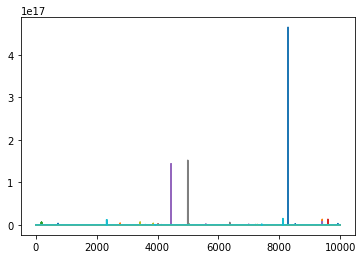

In [6]:
fig, axe = plt.subplots()
for row in df.itertuples():
    axe.plot(row.sample)

In [13]:
g1s = df.groupby(["name", "params", "size"])
for g1 in g1s.groups:
    print(df[g1])

KeyError: ('lognorm_gen', (0.1,), 1)

In [12]:
g1s.groups

{('lognorm_gen', (0.1,), 1): [360, 361, 362, 363, 364, 365, 366, 367, 368, 369], ('lognorm_gen', (0.1,), 5): [370, 371, 372, 373, 374, 375, 376, 377, 378, 379], ('lognorm_gen', (0.1,), 10): [380, 381, 382, 383, 384, 385, 386, 387, 388, 389], ('lognorm_gen', (0.1,), 15): [390, 391, 392, 393, 394, 395, 396, 397, 398, 399], ('lognorm_gen', (0.1,), 20): [400, 401, 402, 403, 404, 405, 406, 407, 408, 409], ('lognorm_gen', (0.1,), 30): [410, 411, 412, 413, 414, 415, 416, 417, 418, 419], ('lognorm_gen', (0.1,), 50): [420, 421, 422, 423, 424, 425, 426, 427, 428, 429], ('lognorm_gen', (0.1,), 100): [430, 431, 432, 433, 434, 435, 436, 437, 438, 439], ('lognorm_gen', (0.1,), 200): [440, 441, 442, 443, 444, 445, 446, 447, 448, 449], ('lognorm_gen', (0.1,), 1000): [450, 451, 452, 453, 454, 455, 456, 457, 458, 459], ('lognorm_gen', (0.1,), 5000): [460, 461, 462, 463, 464, 465, 466, 467, 468, 469], ('lognorm_gen', (0.1,), 10000): [470, 471, 472, 473, 474, 475, 476, 477, 478, 479], ('lognorm_gen', (1.0